In [10]:
from ipynb.fs.full.evaluation import *
from ipynb.fs.full.Data_Processing import *
from numpy import concatenate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Section focuses on visualising the data for: 

- class distribution
- correlations within the data
- PCA component analysis 
- EEG topography plots
- noisy and filtered data

### 1) Visualising the class distribution 

#### a) All Users

In [2]:
# first load the data 

saved_file = "/cs/home/ybk1/Dissertation/data/saved user and test data/all_tests_EEG.pickle"
all_tests = load_file(saved_file)

test_list = []
for user in all_tests:
    test_list.append(all_tests[user])

df = pd.concat(test_list)

at_freq_dist = df['attention'].value_counts()
in_freq_dist = df['interest'].value_counts()
ef_freq_dist = df['effort'].value_counts()
label_freq = [at_freq_dist, in_freq_dist , ef_freq_dist]
classes = [at_freq_dist.index, in_freq_dist.index , ef_freq_dist.index]
titles = ["attention","interest", "effort"]

<Figure size 432x288 with 0 Axes>

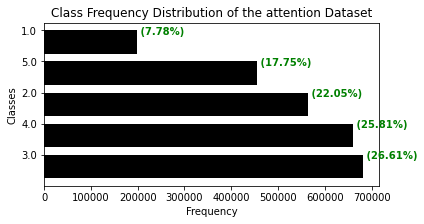

<Figure size 432x288 with 0 Axes>

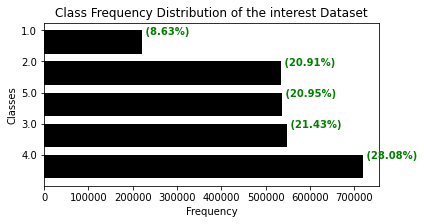

<Figure size 432x288 with 0 Axes>

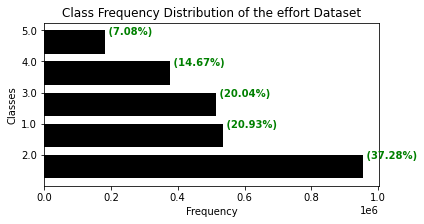

In [13]:
def get_pct(array, value):
    """
    Gets the percentage of a value in proportion to the sum of an array
    return: pct_string
    """
    pct = value/array.sum()
    pct_string =  " ({:.2%})".format(pct)
    return pct_string
#
def plot_class_dist(data, classes, title):
    """
    Plots a 2-D plot, showing the relationship between classes and frequency
    Plots the images seen in Figure 2 of the report. 
    """
    plt.figure()
    fig, ax = plt.subplots(figsize=(6, 3))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    ax.barh(ind, data, width, color="black")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(classes, minor=False)
    plt.title("Class Frequency Distribution of the " + title +  " Dataset")
    plt.xlabel('Frequency')
    plt.ylabel('Classes')
    for i, v in enumerate(data):
        ax.text(v + 3, i + .25, get_pct(data,v), color='green', fontweight='bold')
    plt.savefig("results/viz/Class frequency distribution {0}. Full Dataset.png".format(title))
    plt.show()

for i in range(3):
    plot_class_dist(label_freq[i],classes[i],titles[i])

From the above frequency distribution plots, we can see that there are significant cases of class imbalance for each of the labels. The effort label experiences the largest degree
of class imbalance, where a score of 2 accounts for around 37% of the dataset, whilst scores of 5 only account for 7%. The interest dataset appears to be more balanced with attentions levels of [2,3,5] all having similar proportions of the datasets at 20.91%, 21.43% and 20.95% respectively. While for the attention dataset, scores of 3 and 4 appear to dominate the dataset 

1) Visualising the correlations within the data

a) all users

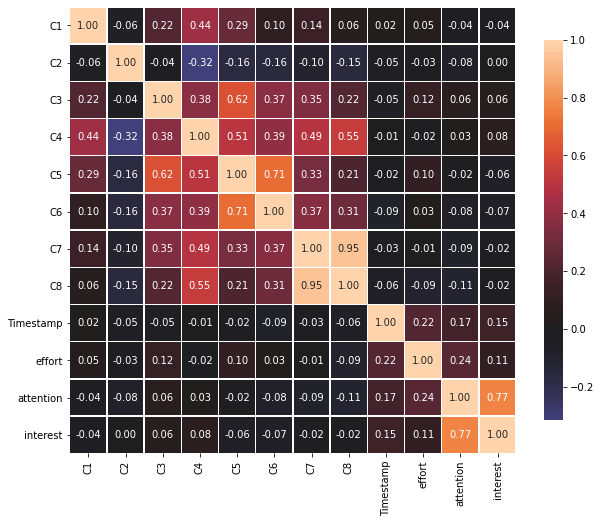

In [4]:
# remove unnecessary columns
df_clean = df.drop(columns=['para',' AdjustedUnix'])

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(df)


- From this correlation heatmap we can see that the EEG channels have a negligible correlation with the target labels (interest, effort, attention), with values between -0.11 - 0.12. Suggestiing that further processing must be done to improve predictive performance
- Interestingly the most correlation was seen between channels C7 vs C8 and C5 vs C6 with coefficents of 0.95 and 0.71 respectively. 
- Attention and interest were shown to correlate the most with each other amongst the labels

b) per user

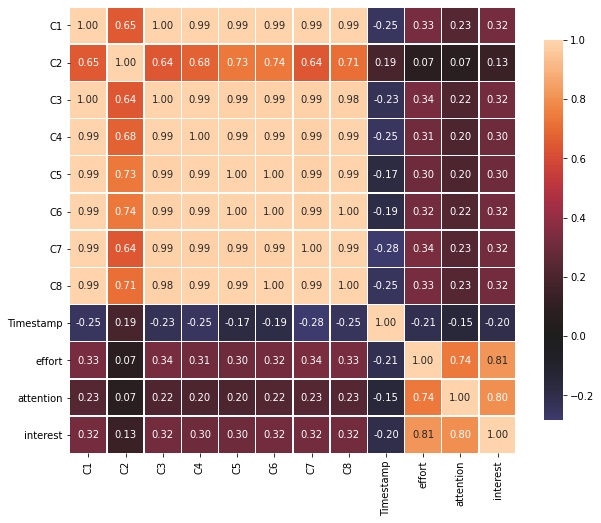

In [8]:
user_1 = all_tests[1].drop(columns=['para',' AdjustedUnix'])
correlation_heatmap(user_1)

User 1 was picked at random and now we can see much higher correlations within the data on user basis, with c3-c8 all having correlations of 0.99/1. Albeit still low but much higher correlations were seen between the channels and the labels with values ranging from 0.07 to 0.33. 
Timestamp was shown to have negative correlation